<a href="https://colab.research.google.com/github/medhj-17/dataset/blob/newdatabranch/CNN_cracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Download and explore the dataset

In [ ]:
##!git clone https://github.com/ardamavi/Dog-Cat-Classifier.git


In [ ]:
##!git clone https://github.com/vyomshm/Cats-Dogs-with-keras.git
!git clone https://github.com/medhj-17/dataset.git 

Cloning into 'dataset'...
remote: Enumerating objects: 38415, done.
remote: Total 38415 (delta 0), reused 0 (delta 0), pack-reused 38415
Receiving objects: 100% (38415/38415), 220.11 MiB | 37.98 MiB/s, done.
Checking out files: 100% (40001/40001), done.


In [ ]:

data_dir_train = 'dataset/dataset/train'
data_dir_test = 'dataset/dataset/test'

Here are some roses:

In [ ]:
batch = 32
img_height = 227
img_width = 227

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.90,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch)

Found 31970 files belonging to 2 classes.
Using 3197 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  validation_split=0.90,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch)

Found 8030 files belonging to 2 classes.
Using 7227 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['train-negative', 'train-positive']


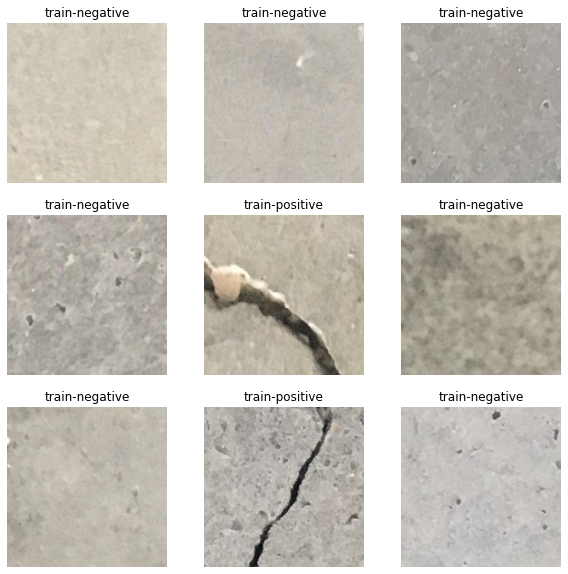

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 227, 227, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)


In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.16470589 0.8980393


# Create the model

 

In [ ]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 227, 227, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 113, 113, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 113, 113, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

## Train the model

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
100/100 [==============================] - 46s 133ms/step - loss: 0.6919 - accuracy: 0.7312 - val_loss: 0.0818 - val_accuracy: 0.9805
Epoch 2/10
100/100 [==============================] - 5s 54ms/step - loss: 0.0846 - accuracy: 0.9771 - val_loss: 0.1402 - val_accuracy: 0.9689
Epoch 3/10
100/100 [==============================] - 5s 55ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.0633 - val_accuracy: 0.9822
Epoch 4/10
100/100 [==============================] - 5s 55ms/step - loss: 0.0895 - accuracy: 0.9755 - val_loss: 0.1170 - val_accuracy: 0.9585
Epoch 5/10
 83/100 [=======================>......] - ETA: 0s - loss: 0.0973 - accuracy: 0.9746

## Visualize training results

Create plots of loss and accuracy on the training and validation sets.

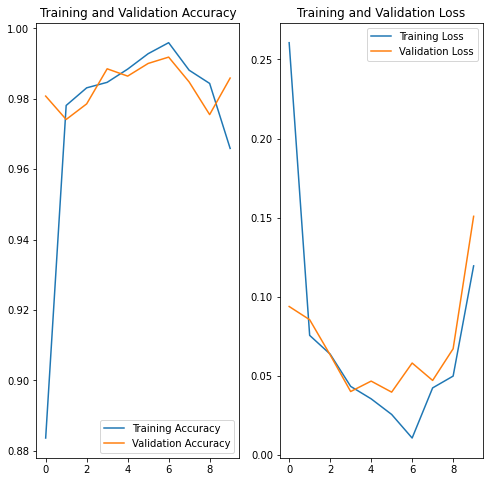

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Overfitting

## Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Let's visualize what a few augmented examples look like by applying data augmentation to the same image several times:

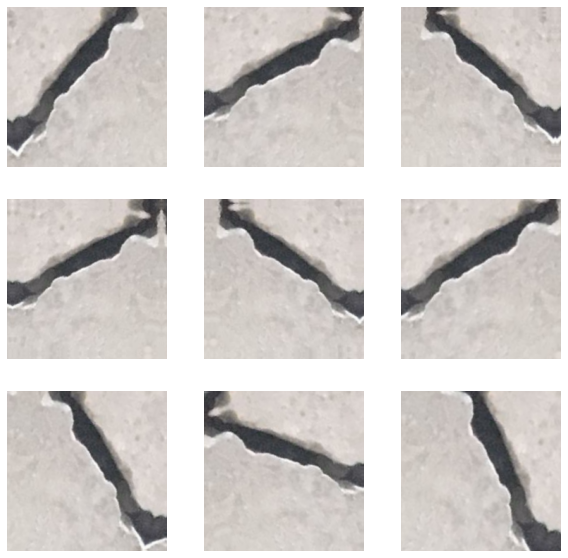

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

You will use data augmentation to train a model in a moment.

## Dropout

Another technique to reduce overfitting is to introduce [Dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization) to the network, a form of *regularization*.


In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 227, 227, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 227, 227, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 113, 113, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 113, 113, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
100/100 [==============================] - 6s 58ms/step - loss: 0.7599 - accuracy: 0.7214 - val_loss: 0.2196 - val_accuracy: 0.9487
Epoch 2/15
100/100 [==============================] - 6s 56ms/step - loss: 0.1160 - accuracy: 0.9675 - val_loss: 0.0550 - val_accuracy: 0.9867
Epoch 3/15
100/100 [==============================] - 6s 57ms/step - loss: 0.0829 - accuracy: 0.9778 - val_loss: 0.1395 - val_accuracy: 0.9720
Epoch 4/15
100/100 [==============================] - 6s 57ms/step - loss: 0.0709 - accuracy: 0.9807 - val_loss: 0.1281 - val_accuracy: 0.9857
Epoch 5/15
100/100 [==============================] - 6s 57ms/step - loss: 0.0678 - accuracy: 0.9805 - val_loss: 0.0514 - val_accuracy: 0.9889
Epoch 6/15
100/100 [==============================] - 6s 57ms/step - loss: 0.0505 - accuracy: 0.9853 - val_loss: 0.0496 - val_accuracy: 0.9844
Epoch 7/15
100/100 [==============================] - 6s 57ms/step - loss: 0.0634 - accuracy: 0.9863 - val_loss: 0.1247 - val_accuracy: 0.9683

## Visualize training results

After applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned. 

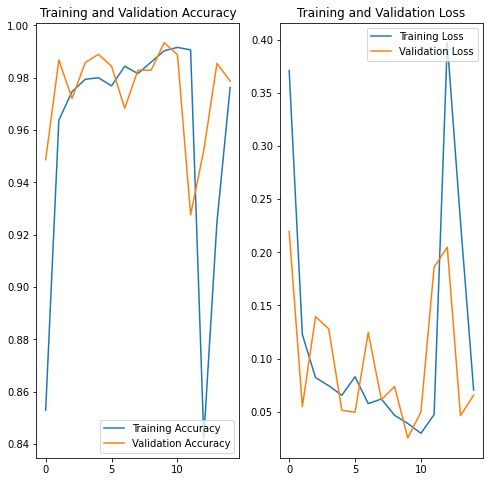

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.

Note: Data augmentation and Dropout layers are inactive at inference time.

This image most likely belongs to train-negative with a 92.92 percent confidence.


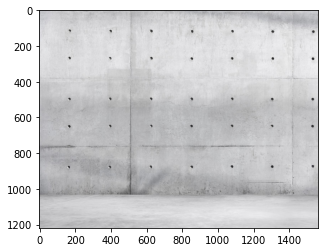

In [ ]:
img0 = "surface-crack.jfif" 
img1 = "surface-crack1.jfif"  ##ces images  sont importer de mon PC donc le programme vous donner une erreur
img2="biton.jpg"
choose= img2

img = keras.preprocessing.image.load_img(
    choose, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


##see the image 
import matplotlib.image as mpimg
img = mpimg.imread(choose)
plt.imshow(img)